In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\Mall_Customers (2).csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
X=df.iloc[:,[3,4]].values

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
from sklearn.cluster import KMeans


In [9]:
k_rng = range(1,11)
wcss= []
for k in k_rng:
    km= KMeans(n_clusters=k, init='k-means++')
    km.fit(X)
    wcss.append(km.inertia_)

In [10]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44454.476479679724,
 37455.98455516028,
 33610.52852664577,
 25355.490610835594,
 26659.36298485855,
 20080.72737314867]

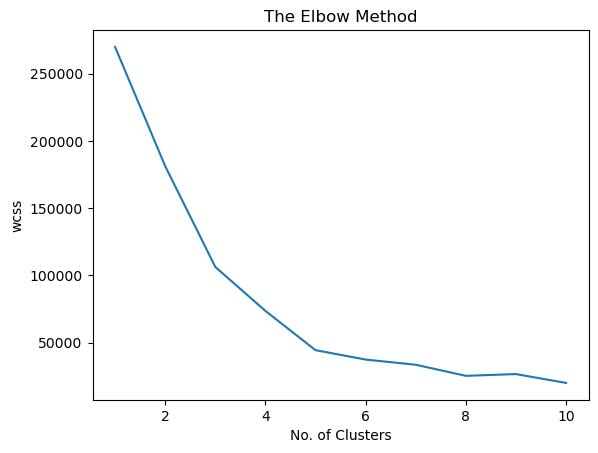

In [11]:
plt.plot(k_rng, wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
kmeansmodel=KMeans(n_clusters=5, init='k-means++', random_state=0)


In [13]:
y_kmeans=kmeansmodel.fit_predict(X)

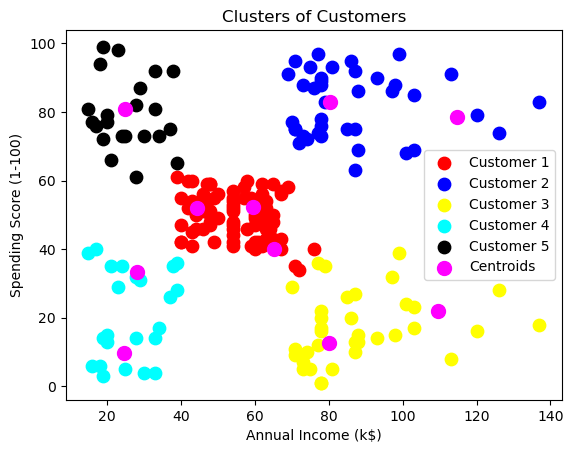

In [15]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80, c='red', label='Customer 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80, c='blue', label='Customer 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80, c='yellow', label='Customer 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80, c='cyan', label='Customer 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80, c='black', label='Customer 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c='magenta', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()